# Einführung in die Statistik mit Python - Tag 3

## Datenverarbeitung in Pandas

### Apply Funktion

In [1]:
# Import libraries
#import pandas as pd
#import numpy as np
import seaborn as sns

# Read dataset
titanic = sns.load_dataset("titanic")

# Create a new function:
def num_missing(x): return sum(x.isnull())

# Applying per column (axis=0)
print(titanic.apply(num_missing, axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [2]:
# Applying per row (axis=1)
print(titanic.apply(num_missing, axis=1).head())

0    1
1    0
2    1
3    0
4    1
dtype: int64


### Imputation von fehlenden Werten

In [3]:
# Import function to determine the mode
from scipy.stats import mode

mode(titanic['deck']) # This returns both mode and count. 
# Mode can return multiple values with high frequency. 

# Take the first mode value
mode(titanic['deck']).mode[0]

# Impute the values:
titanic['deck'].fillna(mode(titanic['deck']).mode[0], inplace=True)

# Now check the missing values again to confirm:
print(titanic.apply(num_missing, axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck             0
embark_town      2
alive            0
alone            0
dtype: int64


/home/matt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


### Crosstab

In [4]:
# Import library
import pandas as pd

# Create crosstab
pd.crosstab(titanic["survived"],titanic["sex"], margins=True)

sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [5]:
def percConvert(ser): return ser/float(ser[-1])

pd.crosstab(titanic["survived"],titanic["sex"], margins=True).apply(percConvert, axis=1)

sex,female,male,All
survived,,,
0,0.147541,0.852459,1.0
1,0.681287,0.318713,1.0
All,0.352413,0.647587,1.0


### Merging von DataFrames

In [6]:
#?pd.merge

# First we create some dummy data
band = pd.DataFrame({"name":["Mick","John","Paul"], 
                     "band":["Stones","Beatles","Beatles"]})
print(band)

   name     band
0  Mick   Stones
1  John  Beatles
2  Paul  Beatles


In [7]:
# Second dummy data
instruments = pd.DataFrame({"name":["John","Paul","Keith"], 
                            "instrument":["guitar","bass","guitar"]})
print(instruments)

    name instrument
0   John     guitar
1   Paul       bass
2  Keith     guitar


In [8]:
# "Merge" to combine DataFrames by common variables
pd.merge(band, instruments, on="name", how="inner")#, suffixes=('_left', '_right'))

,name,band,instrument
0,John,Beatles,guitar
1,Paul,Beatles,bass


In [9]:
pd.merge(band, instruments, how="left")

,name,band,instrument
0,Mick,Stones,NaN
1,John,Beatles,guitar
2,Paul,Beatles,bass


In [10]:
pd.merge(band, instruments, how="right")

,name,band,instrument
0,John,Beatles,guitar
1,Paul,Beatles,bass
2,Keith,NaN,guitar


In [11]:
pd.merge(band, instruments, how="outer")

,name,band,instrument
0,Mick,Stones,NaN
1,John,Beatles,guitar
2,Paul,Beatles,bass
3,Keith,NaN,guitar


In [12]:
# Use a named `left_on` and `right_on` if the join variables have different names
instruments2 = pd.DataFrame({"artist": ["John", "Paul", "Keith"], 
                             "instrument": ["guitar","bass","guitar"]})
instruments2

pd.merge(band, instruments2, left_on="name", right_on= "artist")

,name,band,artist,instrument
0,John,Beatles,John,guitar
1,Paul,Beatles,Paul,bass


### Pivot-Tabelle

In [13]:
# Import library
import seaborn as sns

# Datensatz laden
titanic = sns.load_dataset("titanic")

# Pivot-Tabelle generieren
titanic.pivot_table(columns="class", index="sex", 
                    values="survived", aggfunc="mean")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [14]:
# Oder so
params = {"columns": "class", "index": "sex",
          "values": "survived", "aggfunc": "mean"}
titanic_pivot = titanic.pivot_table(**params)

print(titanic_pivot) # Show pivot table

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


Versucht mal dasselbe mit der Funktion pivot()

In [15]:
#?df.pivot

#params = {
#  "columns": "class",
#  "index": "sex",
#  "values": "survived"
#}
#titanic.pivot(**params)

Warum klappt das nicht?

Aber warum funktioniert es bei dem Beispiel unterhalb:

In [16]:
import pandas as pd

df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6]})
df

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


In [17]:
df_pivot = df.pivot(index='foo', columns='bar', values='baz')
df_pivot

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


### Unpivot (melt)

In [18]:
#?df.melt

In [19]:
# Show column names
df_pivot.columns.values

array(['A', 'B', 'C'], dtype=object)

In [20]:
# Move row Index to column
df_pivot.reset_index(inplace=True)
df_pivot.columns.values

array(['foo', 'A', 'B', 'C'], dtype=object)

In [21]:
df_orig = df_pivot.melt(id_vars=['foo'], value_vars=['A', 'B', 'C'],
                        var_name='bar', value_name='baz')
df_orig

,foo,bar,baz
0,one,A,1
1,two,A,4
2,one,B,2
3,two,B,5
4,one,C,3
5,two,C,6


### stack() und unstack()

In [22]:
# Load numpy library
import numpy as np

# Row Multi-Index
row_idx_arr = list(zip(['r0', 'r0'], ['r-00', 'r-01']))
row_idx = pd.MultiIndex.from_tuples(row_idx_arr)

# Column Multi-Index
col_idx_arr = list(zip(['c0', 'c0', 'c1'], ['c-00', 'c-01', 'c-10']))
col_idx = pd.MultiIndex.from_tuples(col_idx_arr)

# Create the DataFrame
d = pd.DataFrame(np.arange(6).reshape(2,3), index=row_idx, columns=col_idx)
d = d.applymap(lambda x: (x // 3, x % 3))
d

c0              c1
           c-00    c-01    c-10
r0 r-00  (0, 0)  (0, 1)  (0, 2)
   r-01  (1, 0)  (1, 1)  (1, 2)

In [23]:
# Stack
s = d.stack()
s

c0      c1
r0 r-00 c-00  (0, 0)     NaN
        c-01  (0, 1)     NaN
        c-10     NaN  (0, 2)
   r-01 c-00  (1, 0)     NaN
        c-01  (1, 1)     NaN
        c-10     NaN  (1, 2)

In [24]:
# Unstack
u = d.unstack()
u

c0                              c1        
      c-00            c-01            c-10        
      r-00    r-01    r-00    r-01    r-00    r-01
r0  (0, 0)  (1, 0)  (0, 1)  (1, 1)  (0, 2)  (1, 2)

In [25]:
d = u.stack()
d

c0              c1
           c-00    c-01    c-10
r0 r-00  (0, 0)  (0, 1)  (0, 2)
   r-01  (1, 0)  (1, 1)  (1, 2)

## Nachtrag - Tag 2

### Namensräume verbinden

In [26]:
list1 = ['1','2','3','4']  
s = "-"
  
# joins elements of list1 by '-' and stores in string s 
s.join(list1) 

'1-2-3-4'

In [27]:
# Create filename from basename and format
base_filename='my_figure'
format = 'pdf'
filename = ".".join([base_filename, format])

# Specify full path of file directory, please change accordingly
dir_name='/home/matt/Documents/Github/pyStats/'

# Create filename with full path
"".join([dir_name, filename]) 

'/home/matt/Documents/Github/pyStats/my_figure.pdf'

In [28]:
# Alternative approach using the os package
import os
os.path.join(dir_name, base_filename + "." + format)

'/home/matt/Documents/Github/pyStats/my_figure.pdf'

### Speichern von bestimmten Abbildungen

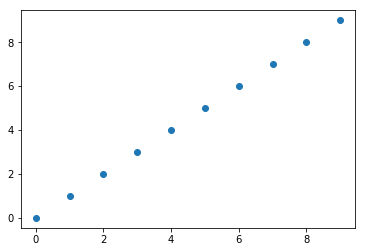

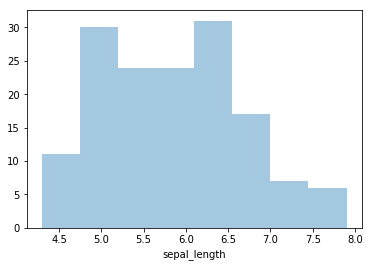

'/home/matt/Documents/Github/pyStats/my_figure.pdf'

In [29]:
import matplotlib.pyplot as plt

f1 = plt.figure()
plt.plot(range(10), range(10), "o")
plt.show()

# Import library and dataset
iris = sns.load_dataset('iris')

# Hist only
f2 = plt.figure()
sns.distplot(a=iris["sepal_length"], hist=True, kde=False, rug=False )
plt.show()

# Save with combined dir_name and filename
file = "".join([dir_name, filename])
file # Make sure the path is correct, before saving!!!

#f1.savefig(file, bbox_inches='tight')

# Save to working directory
#f2.savefig("hist_sepal_length.pdf", bbox_inches='tight')

## Übung

Ladet den Datensatz schoko.csv in Python:

In [30]:
import pandas as pd

# Load your dataset
schoko = pd.read_csv("/home/matt/Documents/Github/pyStats/data/schoko.csv")

# If you have opened the Jupyter Notebook from your local directory,
# this should also work:
schoko = pd.read_csv("data/schoko.csv")

Verschafft euch einen Überblick über den Datensatz:

In [31]:
#schoko.dtypes
schoko.head()
#schoko.shape

,me,Marke,Einkaufsort,Preis,Kategorie,Bio,Fair,crisp,nuss,traube,rum,chili,echte.vanille,cocos,Kakaogehalt,Gewicht,Anzahl.der.Inhaltsstoffe,Nussanteil,Crisps,Verfallsdatum
0,Choceur Weisse Crisp,Choceur,Aldi,99,weiss,nein,nein,1,0,0,0,0,0,0,28.0,200,15,12.0,6,5.0
1,Choceur Alpenvollmilch,Choceur,Aldi,35,vollmilch,nein,nein,0,0,0,0,0,0,0,30.0,100,10,0.0,0,9.0
2,Choceur Haselnuss,Choceur,Aldi,35,vollmilch,nein,nein,0,1,0,0,0,0,0,30.0,100,10,12.0,0,9.0
3,Nusskcker,Nusskcker,Aldi,55,vollmilch,nein,nein,0,1,0,0,0,0,0,32.0,100,9,25.0,0,6.0
4,Happy Halloween,Meybo,Bio Bio,199,vollmilch,ja,nein,0,0,0,0,0,1,0,35.0,100,6,0.0,0,15.0


Findet sämtliche Bio-Schokolade mit einem Preis nicht teurer als 1,6 €:

In [32]:
schoko[(schoko.Bio == "ja") & (schoko.Preis <= 160)]

,me,Marke,Einkaufsort,Preis,Kategorie,Bio,Fair,crisp,nuss,traube,rum,chili,echte.vanille,cocos,Kakaogehalt,Gewicht,Anzahl.der.Inhaltsstoffe,Nussanteil,Crisps,Verfallsdatum
9,Weisse Knusper,Vivani,Bio Bio,159,weiss,ja,nein,1,0,0,0,0,1,0,29.0,100,6,0.0,5,15.0
11,Vollmilch Nuss,Vivani,Bio Bio,159,vollmilch,ja,nein,0,1,0,0,0,1,0,33.0,100,8,10.0,0,6.0
13,LacoaZartbitter,Lacoa,Bio Bio,119,vollmilch,ja,nein,0,0,0,0,0,0,0,70.0,100,3,0.0,0,21.0
14,LacoaVollmichschokolade,Lacoa,Bio Bio,119,vollmilch,ja,nein,0,0,0,0,0,1,0,33.0,100,7,0.0,0,16.0
19,FeineBitter,Vivani,Bio Bio,159,bitter,ja,nein,0,0,0,0,0,0,0,72.0,100,3,0.0,0,19.0
21,Kids,Vivani,Bio Bio,159,vollmilch,ja,nein,0,0,0,0,0,1,0,33.0,100,10,0.0,0,2.0


Sortiert den Datensatz nach Bio und Preis:

In [33]:
schoko.sort_values(by=["Bio", "Preis"], inplace=True)
schoko.head()

,me,Marke,Einkaufsort,Preis,Kategorie,Bio,Fair,crisp,nuss,traube,rum,chili,echte.vanille,cocos,Kakaogehalt,Gewicht,Anzahl.der.Inhaltsstoffe,Nussanteil,Crisps,Verfallsdatum
13,LacoaZartbitter,Lacoa,Bio Bio,119,vollmilch,ja,nein,0,0,0,0,0,0,0,70.0,100,3,0.0,0,21.0
14,LacoaVollmichschokolade,Lacoa,Bio Bio,119,vollmilch,ja,nein,0,0,0,0,0,1,0,33.0,100,7,0.0,0,16.0
9,Weisse Knusper,Vivani,Bio Bio,159,weiss,ja,nein,1,0,0,0,0,1,0,29.0,100,6,0.0,5,15.0
11,Vollmilch Nuss,Vivani,Bio Bio,159,vollmilch,ja,nein,0,1,0,0,0,1,0,33.0,100,8,10.0,0,6.0
19,FeineBitter,Vivani,Bio Bio,159,bitter,ja,nein,0,0,0,0,0,0,0,72.0,100,3,0.0,0,19.0


Erstellt eine Pivot-Tabelle für Marke, Kategorie und Preis (pivot_table()):

In [34]:
schoko_pivot = schoko.pivot_table(columns="Marke", index="Kategorie", values="Preis") #, aggfunc="mean")
schoko_pivot

Marke,Alpia,Choceur,Gepa,Lacoa,Lindt,Meybo,Milka,Nestle,Niederegger,Nusskcker,RS,Rapunzel,Ritter Sport,Vivani,turata
Kategorie,,,,,,,,,,,,,,,
bitter,49.0,NaN,230.0,NaN,149.000000,199.0,NaN,NaN,NaN,NaN,119.0,NaN,85.0,189.0,199.0
reismilch,NaN,NaN,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vollmilch,49.0,35.0,250.0,119.0,189.333333,199.0,79.0,NaN,195.0,55.0,119.0,195.0,85.0,159.0,249.0
weiss,NaN,99.0,NaN,NaN,270.000000,NaN,NaN,89.0,NaN,NaN,NaN,NaN,85.0,159.0,NaN


Erstellt eine Heatmap von der Pivot-Tabelle (sns.heatmap()):

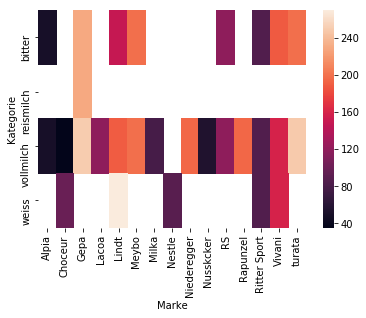

In [35]:
# Import your libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Hist only
sns.heatmap(schoko_pivot)
#plt.savefig('/home/matt/Desktop/plot.png')

Erstellt eine Grafik (sns.catplot()) mit Bio, Preis & Kategorie:

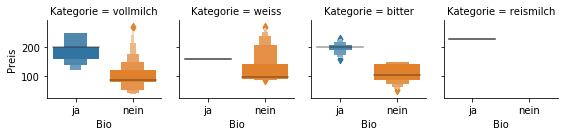

In [36]:
conf = {
"x": "Bio",
"y": "Preis",
"col": "Kategorie",
"kind": "boxen",
"data": schoko,
"height": 2,
"sharex": False,
"dodge": False,
}

f = sns.catplot(**conf)
f

Und nun nochmal mit sns.violinplot():

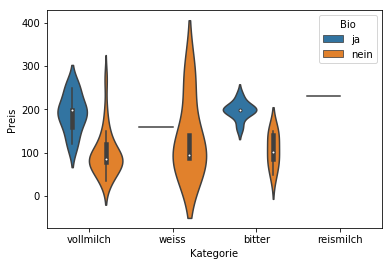

In [37]:
sns.violinplot(x="Kategorie", y="Preis", hue="Bio", data=schoko)

Erstellt nun noch einen Scatterplot (sns.scatterplot()) mit Kakaogehalt, Preis, Kategorie \& Anzahl der Inhaltsstoffe:

Text(0.5, 1.0, 'Verhältnis von Kakaogehalt und Preis')

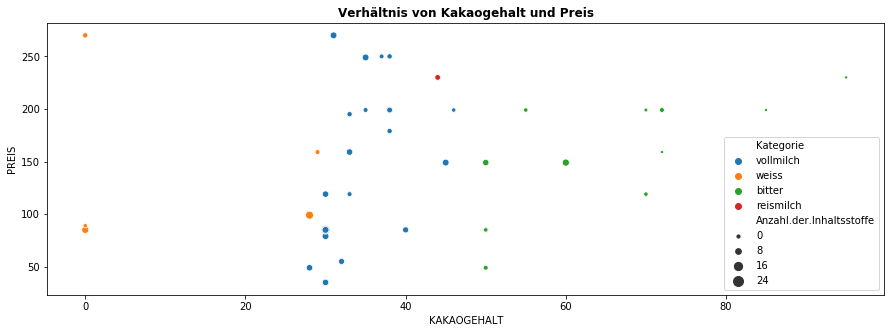

In [38]:
# Figure und Axes Objekt anlegen
fig, ax = plt.subplots(figsize=(15, 5))

# Grafik anlegen
conf = {
"x": "Kakaogehalt",
"y": "Preis",
"hue": "Kategorie",
"size": "Anzahl.der.Inhaltsstoffe",
"sizes": (10, 100),
"data": schoko,
"ax": ax
}
sns.scatterplot(**conf)

# Beschriftung formatieren und festlegen
font = {"weight": "bold"}
ax.set(xlabel=conf["x"].upper(), ylabel=conf["y"].upper())
title = ("Verhältnis von Kakaogehalt und Preis")

plt.title(title, **font)

## Verteilungs- \& Dichtefunktionen

### Bernoulli-Verteilung

In [39]:
from scipy import stats

p = 0.5
bernoulliDist = stats.bernoulli(p)

# In Python this is called a “frozen distribution function”, 
# and it allows us to calculate everything we want for this distribution. 
# For example, the probability if head comes up zero or one times is given by the probability mass function (PMF)

# Probability mass function
p_tails = bernoulliDist.pmf(0)
p_heads = bernoulliDist.pmf(1)

# And we can simulate 10 Bernoulli trials with
trials = bernoulliDist.rvs(10) # rvs = random variates
trials

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

### Binomial-Verteilung

In [40]:
from scipy import stats
import numpy as np

# Frozen distribution function
(p, num) = (0.5, 4)
binomDist = stats.binom(num, p)

# Calculate the probabilities how often heads come up 
# during four tosses, given by the PMF
binomDist.pmf(np.arange(5))

array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

### Poisson-Verteilung

In [41]:
# Generate the distribution.
# Watch out NOT to divide integers, 
# as "3/4" gives "0" in Python 2.x!
prob = 62./(365./7)
pd = stats.poisson(prob)

# Select the interesting numbers, 
# calculate the PMF, and print the results
x = [0,2,5]
y = pd.pmf(x)*100
for num, solution in zip(x,y):
  print('''The chance of having {0} fatal accidents in one 
        week is {1:4.1f}%.'''.format(num,solution))

The chance of having 0 fatal accidents in one 
        week is 30.5%.
The chance of having 2 fatal accidents in one 
        week is 21.5%.
The chance of having 5 fatal accidents in one 
        week is  0.6%.


### Normalverteilung

In [42]:
import numpy as np
from scipy import stats

mu = -2
sigma = 0.7
myDistribution = stats.norm(mu, sigma)
significanceLevel = 0.05

myDistribution.ppf([significanceLevel/2, 1-significanceLevel/2])

array([-3.37197479, -0.62802521])

### t-Verteilung

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = [52, 70, 65, 85, 62, 83, 59] # Enter the data

# Generate the t-distribution: DOF = length data minus 1.
td = stats.t(len(x)-1); alpha = 0.01

# From the t-distribution, you use the "PPF" function and 
# multiply it with the standard error
tval = abs(td.ppf(alpha/2)*stats.sem(x))
print('mean +/- 99%CI = {0:3.1f} +/- {1:3.1f}'.format(np.mean(x),tval))

mean +/- 99%CI = 68.0 +/- 17.2


### Chi-Quadratverteilung

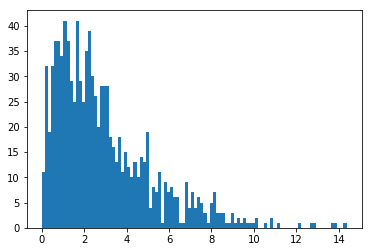

In [44]:
# Define the normal distribution
nd = stats.norm()

# Generate three sets of random variates from this distribution
numData = 1000
data1 = nd.rvs(numData)
data2 = nd.rvs(numData)
data3 = nd.rvs(numData)

# Show a histogram of the sum of the squares of 
# these random data
plt.hist(data1**2+data2**2 +data3**2, 100)
plt.show()

### F-Verteilung

In [45]:
apples1 = [110, 121, 143]
apples2 = [88, 93, 105, 124]

fval = np.std(apples1, ddof=1)/np.std(apples2, ddof=1)
fd = stats.distributions.f(len(apples1),len(apples2))
pval = fd.cdf(fval)

print('The p-value of the F-distribution = {0}.'.format(pval))
if pval>0.025 and pval<0.975:
  print('The variances are equal.')

The p-value of the F-distribution = 0.537640478466751.
The variances are equal.


## Normality check

### Probability plots

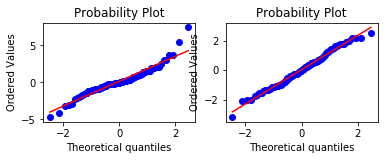

In [46]:
from scipy import stats
import matplotlib.pyplot as plt
nsample = 100
np.random.seed(7654321)

# A t distribution with small degrees of freedom:
ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt)

# A t distribution with larger degrees of freedom:
ax2 = plt.subplot(222)
x = stats.t.rvs(25, size=nsample)
res = stats.probplot(x, plot=plt)
plt.show()

### Tests for Normality

#### D'Agostino-Pearson Omnibus-Test

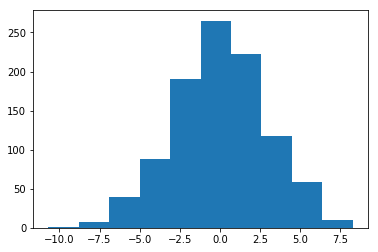

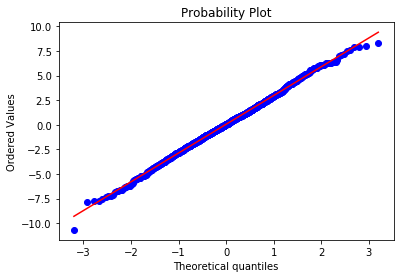

NormaltestResult(statistic=0.1805408823000446, pvalue=0.913684054089169)
NormaltestResult(statistic=10.794182887834198, pvalue=0.004529736794579303)


In [47]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Set the parameters
numData = 1000
myMean = 0
mySD = 3

# To get reproducable values, I provide a seed value
np.random.seed(1234)   
    
# Generate and show random data
data = stats.norm.rvs(myMean, mySD, size=numData)
fewData = data[:100]
plt.hist(data)
plt.show()

# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
stats.probplot(data, plot=plt)
plt.show()

# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
print(stats.normaltest(data))
print(stats.normaltest(fewData))

#### Shapiro-Wilk normality test

In [48]:
# Shapiro-Wilk test
print(stats.shapiro(data))
print(stats.shapiro(fewData))

(0.9985058903694153, 0.5584741830825806)
(0.9742451906204224, 0.0471017062664032)


#### Kolmogorov-Smirnov normality test

In [49]:
# Kolmogorov-Smirnov test
print(stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm'))
print(stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm'))

KstestResult(statistic=0.018090443026108516, pvalue=0.8989669136577692)
KstestResult(statistic=0.07383212034840342, pvalue=0.6406771608350166)


### Daten-Transformation

#### log-Transformation

In [50]:
# example dataframe
df = pd.DataFrame({'a': [0, 1, 2, 3], 
                   'b': [4, 5, np.nan, 7], 
                   'c': [8, 9, 10, 11]})

# apply log(x+1) element-wise to a subset of columns
df_log = df[['a', 'b']].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

# shift the index
df_log.index = df_log.index + 1

# If you want a special treatment for missing values, you can do:
df_log[df_log.isnull()] = -1

# Print DataFrame
df_log

,log_a,log_b
1,0.000000,1.609438
2,0.693147,1.791759
3,1.098612,-1.000000
4,1.386294,2.079442


### Sample size

#### Stichprobengröße bei bekannter Population

In [51]:
from scipy import stats
import math

def sample_size_pop(N, e=0.05, c=0.95, p=0.5, extra=None):
  """Stichprobengröße bei bekannter Population.
     N: Population / Grundgesamtheit
     e: Fehlertoleranz
     c: Konfidenzniveau
     p: geschätzter Anteilswert
     extra: Zusatz für fehlenden Rücklauf [0, 1]
  """
  
  z = stats.norm.ppf((1 + c) / 2)
  frac_n = (z**2 * p*(1-p)) / e**2
  frac_d = 1 + ((z**2 * p*(1-p)) / (e**2 * N))
  n = frac_n / frac_d
  if extra:
    n = n + n * extra
    # Werte aufrunden
  return math.ceil(n)

# Beispiel
n = 4000
sample_size_pop(n, c=0.99, e=0.03, p=0.5, extra=0.05) #out: 1325
sample_size_pop(n, c=0.95, e=0.05, p=0.8, extra=0.05) #out: 244

244

#### Stichprobengröße für den Vergleich von zwei bekannten Gruppen

In [52]:
#Calculate the sample size for experiments, for normally distributed groups, for comparing two groups

# Import standard packages
import numpy as np

# additional packages
from scipy.stats import norm

def sampleSize_twoGroups(D, alpha=0.05, beta=0.2, sigma1=1, sigma2=1):
    '''Sample size for two groups. The formula corresponds to Eq 6.4 in the book.'''
    
    n = np.round((norm.ppf(1-alpha/2.) + norm.ppf(1-beta))**2 * (sigma1**2 + sigma2**2) / D**2)
    
    print(('In order to detect a change of {0} between groups with an SD of {1} and {2},'.format(D, sigma1, sigma2)))
    print(('''with significance {0} and test-power {1}, 
           you need in each group at least {2:d} subjects.'''.format(alpha, 100*(1-beta), int(n))))
    return n

sampleSize_twoGroups(0.4, sigma1=0.6, sigma2=0.6)

In order to detect a change of 0.4 between groups with an SD of 0.6 and 0.6,
with significance 0.05 and test-power 80.0, 
           you need in each group at least 35 subjects.


35.0

#### Stichprobengröße bei unbekannter Population

In [53]:
from scipy import stats
import math
def sample_size(e=0.05, c=0.95, p=0.5, extra=None):
  """
  Stichprobengröße, unbekannte Population.
  Parameter
  ---------
    e: Fehlertoleranz
    c: Konfidenzniveau
    p: geschätzter Anteilswert
    extra: Zusatz für fehlenden Rücklauf
  Returns
  -------
    n, sample size -> int
  """
  z = stats.norm.ppf((1 + c) / 2)
  n = (z**2 * p * (1-p)) / e**2
  if extra:
   n = n + n * extra
  return math.ceil(n)

sample_size(p=0.09, e=0.01, c=0.95) #out: 3147

3147

#### Poweranalyse mit statsmodels

für eine Gruppe

In [54]:
from statsmodels.stats import power
nobs = power.tt_solve_power(effect_size = 0.5, alpha =0.05, power=0.8)
print(nobs)

33.3671314275208


für zwei Gruppen

In [55]:
nobs = power.tt_ind_solve_power(effect_size = 0.5, alpha =0.05, power=0.8)
print(nobs)

63.765611775409525


In [56]:
effect_size = power.tt_ind_solve_power(alpha =0.05, power=0.8, nobs1=25)
print(effect_size)

0.8087077886680412


## Induktive Statistik

### Verteilungs-Tests

#### Einstichproben-t-Test

In [57]:
# One-sample t-Test
from scipy import stats

np.random.seed(7654567)  # fix seed to get the same result
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))

# Test if mean of random sample is equal to true mean
t, pVal = stats.ttest_1samp(rvs,5.0)
print(t); print(pVal)

[-0.68014479 -0.04323899]
[0.49961383 0.96568674]


In [58]:
# Test if mean of random sample is equal to different mean (0)
t, pVal = stats.ttest_1samp(rvs,0.0)
print(t); print(pVal)

[2.77025808 4.11038784]
[0.00789095 0.00014999]


We reject the null hypothesis in the second case and don't reject it in the first case.

#### Wilcoxon-Vorzeichen-Rang-Test

In [59]:
# Wilcoxon Signed Rank Sum test
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, -60]
rank, pVal = stats.wilcoxon(d)
print(rank); print(pVal)

23.0
0.11585149752593009


### Vergleich von zwei abhängigen Verteilungen

#### (gepaarter t-Test)

In [60]:
# paired t-test

import numpy as np
from scipy import stats

np.random.seed(1234)
data = np.random.randn(10)+0.1
data1 = np.random.randn(10)*5 # dummy data
data2 = data1 + data

# paired t-test
print(stats.ttest_rel(data2, data1))
# same group-difference as "data"

# one-sample t-test on data
print(stats.ttest_1samp(data, 0))

Ttest_relResult(statistic=-0.1245849229873135, pvalue=0.9035904508547089)
Ttest_1sampResult(statistic=-0.12458492298731401, pvalue=0.9035904508547086)


### Vergleich von zwei unabhängigen Verteilungen

#### Zweistichproben-t-Test (ungepaart)

In [61]:
# two-sample t-Test
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)

stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=0.37253970303059, pvalue=0.7095701552042009)

In [62]:
# `ttest_ind` underestimates p for unequal variances:

rvs3 = stats.norm.rvs(loc=5, scale=20, size=500)
stats.ttest_ind(rvs1, rvs3, equal_var = False)

Ttest_indResult(statistic=-0.3985984494918709, pvalue=0.6903088057124194)

In [63]:
# When n1 != n2, the equal variance t-statistic is no longer equal to the
# unequal variance t-statistic:

rvs4 = stats.norm.rvs(loc=5, scale=20, size=100)
print(stats.ttest_ind(rvs1, rvs4))
print(stats.ttest_ind(rvs1, rvs4, equal_var = False))

Ttest_indResult(statistic=-1.8714304469876069, pvalue=0.06177345109934761)
Ttest_indResult(statistic=-1.181542065426572, pvalue=0.23998895128328585)


In [64]:
# T-test with different means, variance, and n:

rvs5 = stats.norm.rvs(loc=8, scale=20, size=100)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-2.0228467894259325, pvalue=0.04353343278712891)

#### Non-parametrischer Vergleich von zwei Gruppen

Mann-Whitney test

In [65]:
# Mann-Whitney test
import numpy as np
import scipy.stats as stats

# Create two groups of data
group1 = [1, 5 ,7 ,3 ,5 ,8 ,34 ,1 ,3 ,5 ,200, 3]
group2 = [10, 18, 11, 12, 15, 19, 9, 17, 1, 22, 9, 8]

# Calculate u and probability of a difference
u_statistic, pVal = stats.mannwhitneyu(group1, group2)

# Print p-Value
print (pVal)

0.013880800754602955


### Vergleich von mehreren Gruppen

#### ANOVA

In [66]:
# 1-way ANOVA
import scipy.stats as stats

# Here are some data on a shell measurement (the length of the anterior adductor muscle scar, standardized by dividing by length) in the mussel
# Mytilus trossulus from five locations: Tillamook, Oregon; Newport, Oregon; Petersburg, Alaska; Magadan, Russia; and Tvarminne, Finland, taken from a 
# much larger data set used in McDonald et al. (1991).

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [67]:
# Varianz Analyse (ANOVA)

# Import libraries
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data
iris = sns.load_dataset("iris")

# Perform ANOVA
model = ols('sepal_length ~ C(species)', iris).fit()
anovaResults = sm.stats.anova_lm(model)
print(anovaResults)

               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN


#### Post-Hoc Analyse

Tukey HSD

In [68]:
# Tukey HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
res2 = pairwise_tukeyhsd(iris['sepal_length'], iris['species'])
print(res2)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1     group2   meandiff lower  upper  reject
---------------------------------------------------
  setosa   versicolor   0.93   0.6862 1.1738  True 
  setosa   virginica   1.582   1.3382 1.8258  True 
versicolor virginica   0.652   0.4082 0.8958  True 
---------------------------------------------------


In [69]:
# Load multicomparison
from statsmodels.stats.multicomp import MultiComparison

# Compare models
mod = MultiComparison(iris['sepal_length'], iris['species'])

# Run TukeyHSD
print(mod.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1     group2   meandiff lower  upper  reject
---------------------------------------------------
  setosa   versicolor   0.93   0.6862 1.1738  True 
  setosa   virginica   1.582   1.3382 1.8258  True 
versicolor virginica   0.652   0.4082 0.8958  True 
---------------------------------------------------


From the result, we see that we cannot reject the hypothesis that any of the groups have the same mean.

Bonferroni Korrektur

In [70]:
# Compare models, same as above
mod = MultiComparison(iris['sepal_length'], iris['species'])

# Bonferroni Correction
rtp = mod.allpairtest(stats.ttest_rel, method='b')
print(rtp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=b
alphacSidak=0.02, alphacBonf=0.017
  group1     group2     stat   pval pval_corr reject
----------------------------------------------------
  setosa   versicolor -10.1459 0.0     0.0     True 
  setosa   virginica  -16.3441 0.0     0.0     True 
versicolor virginica  -5.2753  0.0     0.0     True 
----------------------------------------------------


Holm Korrektur

In [71]:
# Compare models, same as above
mod = MultiComparison(iris['sepal_length'], iris['species'])

# Holm correction
rtp = mod.allpairtest(stats.ttest_rel, method='Holm')
print(rtp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
  group1     group2     stat   pval pval_corr reject
----------------------------------------------------
  setosa   versicolor -10.1459 0.0     0.0     True 
  setosa   virginica  -16.3441 0.0     0.0     True 
versicolor virginica  -5.2753  0.0     0.0     True 
----------------------------------------------------


### Nicht-parametrischer Vergleich von mehreren Gruppen

#### Kurskal-Wallis Test

In [72]:
# Load stats library
from scipy import stats

# Create dummy data
x = [1, 1, 1]
y = [2, 2, 2]
z = [2, 2]

# Perform Kruskal-Wallis test
stats.kruskal(x, y, z)

KruskalResult(statistic=7.0, pvalue=0.0301973834223185)

### Vergleich von mehreren Faktoren

In [73]:
# Two-way ANOVA

# Load libraries
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load data
titanic = sns.load_dataset("titanic")
titanic.head()

# Determine the ANOVA with interaction
formula = 'age ~ C(sex) + C(pclass) + C(pclass):C(sex)'
lm = ols(formula, titanic).fit()
anovaResults = anova_lm(lm)

#print(anovaResults)

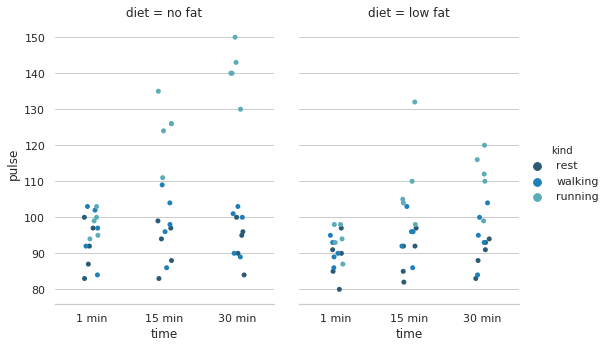

In [74]:
# Three-way ANOVA (just visual)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = sns.load_dataset("exercise")

sns.catplot("time", "pulse", hue="kind", 
               col="diet", data=df, 
               hue_order=["rest", "walking", "running"], 
               palette="YlGnBu_d", 
               aspect=.75).despine(left=True)
plt.show()

## Tests an Kategorischen Daten

### One-Way Chi-Square test

In [75]:
import pandas as pd
df = pd.DataFrame({"name":["You", "Peter", "Hans", "Paul"], 
                   "dishes":[10, 7, 6, 5]})

from scipy import stats
V, p = stats.chisquare(df["dishes"])
print(p) # 0.5724067044708798

0.5724067044708798


### Chi-Quadrat-Kontingenztest

In [76]:
data = np.array([[43,9], [44,4]])
V, p, dof, expected = stats.chi2_contingency(data)
print(p) # 0.300384770391

0.300384770390566


### Fishers exact Test

In [77]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(data)
pvalue # 0.23915695682

0.23915695682224306

## Übung II

Lade den Datensatz **schoko.csv** in Python

In [78]:
import pandas as pd

# Load your dataset
schoko = pd.read_csv("/home/matt/Documents/Github/pyStats/data/schoko.csv")
schoko.head()

,me,Marke,Einkaufsort,Preis,Kategorie,Bio,Fair,crisp,nuss,traube,rum,chili,echte.vanille,cocos,Kakaogehalt,Gewicht,Anzahl.der.Inhaltsstoffe,Nussanteil,Crisps,Verfallsdatum
0,Choceur Weisse Crisp,Choceur,Aldi,99,weiss,nein,nein,1,0,0,0,0,0,0,28.0,200,15,12.0,6,5.0
1,Choceur Alpenvollmilch,Choceur,Aldi,35,vollmilch,nein,nein,0,0,0,0,0,0,0,30.0,100,10,0.0,0,9.0
2,Choceur Haselnuss,Choceur,Aldi,35,vollmilch,nein,nein,0,1,0,0,0,0,0,30.0,100,10,12.0,0,9.0
3,Nusskcker,Nusskcker,Aldi,55,vollmilch,nein,nein,0,1,0,0,0,0,0,32.0,100,9,25.0,0,6.0
4,Happy Halloween,Meybo,Bio Bio,199,vollmilch,ja,nein,0,0,0,0,0,1,0,35.0,100,6,0.0,0,15.0


Prüfe ob der Preis von Schokolade normalverteilt ist (visuell und statistisch)

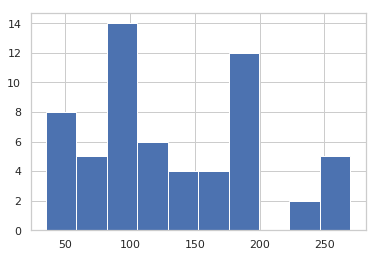

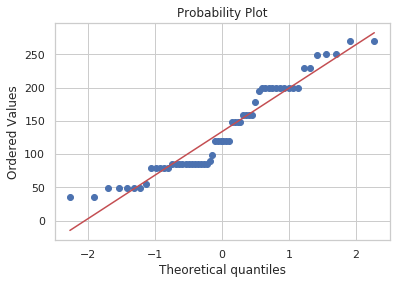

In [79]:
from scipy import stats
import matplotlib.pyplot as plt

plt.hist(schoko["Preis"])
plt.show()

stats.probplot(schoko["Preis"], plot=plt)
plt.show()

In [80]:
# Shapiro-Wilk test
print(stats.shapiro(schoko["Preis"]))

(0.9231991171836853, 0.0010341410525143147)


Prüfe ob Bio-Schokolade signifikant teurer/billiger als normale Schokolade ist

2.1262781683610106e-08


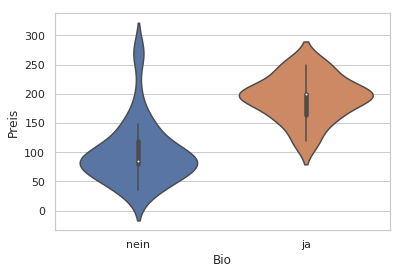

In [81]:
# Mann-Whitney test
import seaborn as sns

group1 = schoko[(schoko.Bio == "ja")]
group2 = schoko[(schoko.Bio == "nein")]

sns.violinplot(x="Bio", y="Preis", data=schoko)

# Calculate u and probability of a difference
u_statistic, pVal = stats.mannwhitneyu(group1["Preis"], group2["Preis"])

# Print p-Value
print(pVal)

Prüfe ob der Schokoladen-Preis von der Kategorie abhängig ist

KruskalResult(statistic=4.0335955677598365, pvalue=0.2578591925608929)

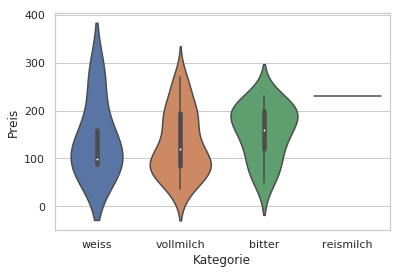

In [82]:
# Load stats library
from scipy import stats

# Create dummy data
group1 = schoko[(schoko.Kategorie == "weiss")]
group2 = schoko[(schoko.Kategorie == "vollmilch")]
group3 = schoko[(schoko.Kategorie == "bitter")]
group4 = schoko[(schoko.Kategorie == "reismilch")]

sns.violinplot(x="Kategorie", y="Preis", data=schoko)

# Perform Kruskal-Wallis test
stats.kruskal(group1.Preis, group2.Preis, group3.Preis, group4.Preis)

Erstelle eine Kontingenztabelle mit Bio & Fair und prüft ob es möglich ist, dass die Verteilung durch Zufall zustande kam

In [83]:
# Import library
import pandas as pd

# Create crosstab
schoko_tab = pd.crosstab(schoko["Bio"], schoko["Fair"], margins=True)
schoko_tab

Fair,ja,nein,All
Bio,,,
ja,4,18,22
nein,0,38,38
All,4,56,60


In [84]:
def percConvert(ser): return ser/float(ser[-1])

pd.crosstab(schoko["Bio"], schoko["Fair"], margins=True).apply(percConvert, axis=1)

Fair,ja,nein,All
Bio,,,
ja,0.181818,0.818182,1.0
nein,0.000000,1.000000,1.0
All,0.066667,0.933333,1.0


In [85]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(schoko_tab.iloc[0:2,0:2])
pvalue

0.01500097408922652

In [86]:
V, p, dof, expected = stats.chi2_contingency(schoko_tab.iloc[0:2,0:2])
print(p)

0.0289786309279283


Erstelle eine Kontingenztabelle mit Bio \& Kategorie und prüft ob es möglich ist, dass die Verteilung durch Zufall zustande kam

In [87]:
schoko_tab = pd.crosstab(schoko["Bio"], schoko["Kategorie"], margins=False)
# margins=False, otherwise "All" values are included in the chi2-contingency test

schoko_tab#.iloc[0:2,0:4]

Kategorie,bitter,reismilch,vollmilch,weiss
Bio,,,,
ja,7,1,13,1
nein,6,0,24,4


In [88]:
V, p, dof, expected = stats.chi2_contingency(schoko_tab)
print(p)

0.290009367111933


In [89]:
V, p, dof, expected = stats.chi2_contingency(schoko_tab.iloc[0:2,0:4])
print(p)

0.290009367111933
